## Bike Sharing Assignment

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### Business Objectives

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Reading and Understanding Data

In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.float_format' ,'{:.2f}'.format)

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the day.csv dataset using pandas
bikeshare= pd.read_csv("day.csv")

In [5]:
#Inspecting the dataframe
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [6]:
bikeshare.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.42,11.33,65.29,23.46,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.39,12.75,59.00,10.42,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.39,12.12,75.29,8.33,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.49,11.59,48.33,23.50,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.85,11.17,57.75,10.37,439,2290,2729


In [7]:
#Checking the details of numerical data
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.69,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.00,0.46,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [8]:
#Checking dataframe for null and datatype 
bikeshare.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#checking the shape of dataframe
bikeshare.shape

(730, 16)

In [10]:
# Checking for duplicates and dropping the entire duplicate rows if there is any that exists

bike_dup = bikeshare.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_dup.shape

(730, 16)

In [12]:
bikeshare.shape

(730, 16)

#### Observations

 There are 730 rows and 16 columns in which there are no null values or duplicates present. Only dteday as object datatype rest variables are either integer or float.

### Data Cleaning

In [13]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


Here the Feature 'instant' is just the serial number of the dataset, so we are dropping it. At the same time we are also dropping the feature 'dteday' as it shows the date and it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.Similarly casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way such that cnt = casual + registered, which leads to data leakage. Hence we have to drop all these varibles.

In [14]:
#Before dropping date, we introduce a days_old variable which indicates how old the business is
bikeshare['days_old'] = (pd.to_datetime(bikeshare['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
#Dropping instant dteday,registered and casual as they are unwanted columns
bikeshare.drop(['instant','dteday','registered','casual'],axis=1,inplace=True)

In [16]:
##Inspecting data frame after dropping
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.11,18.18,80.58,10.75,985,0
1,1,0,1,0,2,1,2,14.90,17.69,69.61,16.65,801,1
2,1,0,1,0,3,1,1,8.05,9.47,43.73,16.64,1349,2
3,1,0,1,0,4,1,1,8.20,10.61,59.04,10.74,1562,3
4,1,0,1,0,5,1,1,9.31,11.46,43.70,12.52,1600,4


In [17]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [18]:
bikeshare.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
bikeshare.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [20]:
bikeshare.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.00,-0.00,0.83,-0.01,0.00,0.02,0.02,0.33,0.34,0.21,-0.23,0.40,0.41
yr,-0.00,1.00,-0.00,0.01,0.00,-0.01,-0.05,0.05,0.05,-0.11,-0.01,0.57,0.87
mnth,0.83,-0.00,1.00,0.02,-0.00,-0.01,0.05,0.22,0.23,0.22,-0.21,0.28,0.50
holiday,-0.01,0.01,0.02,1.00,-0.02,-0.26,-0.03,-0.03,-0.03,-0.02,0.01,-0.07,0.02
weekday,0.00,0.00,-0.00,-0.02,1.00,0.00,0.03,0.04,0.04,0.01,-0.02,0.04,-0.00
workingday,0.02,-0.01,-0.01,-0.26,0.00,1.00,-0.03,0.00,0.01,0.05,-0.00,-0.03,-0.02
weathersit,0.02,-0.05,0.05,-0.03,0.03,-0.03,1.00,-0.12,-0.12,0.59,0.04,-0.30,-0.02
temp,0.33,0.05,0.22,-0.03,0.04,0.00,-0.12,1.00,0.99,0.13,-0.16,0.63,0.15
atemp,0.34,0.05,0.23,-0.03,0.04,0.01,-0.12,0.99,1.00,0.14,-0.18,0.63,0.15
hum,0.21,-0.11,0.22,-0.02,0.01,0.05,0.59,0.13,0.14,1.00,-0.25,-0.10,0.02


#### Observation

 Columns like season, mnth, weekday and weathersit are comnsidered as integers even though they should be non-numerical categories.

In [21]:
bikeshare.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [22]:
#Printing number of unique values in all columns
bikeshare.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

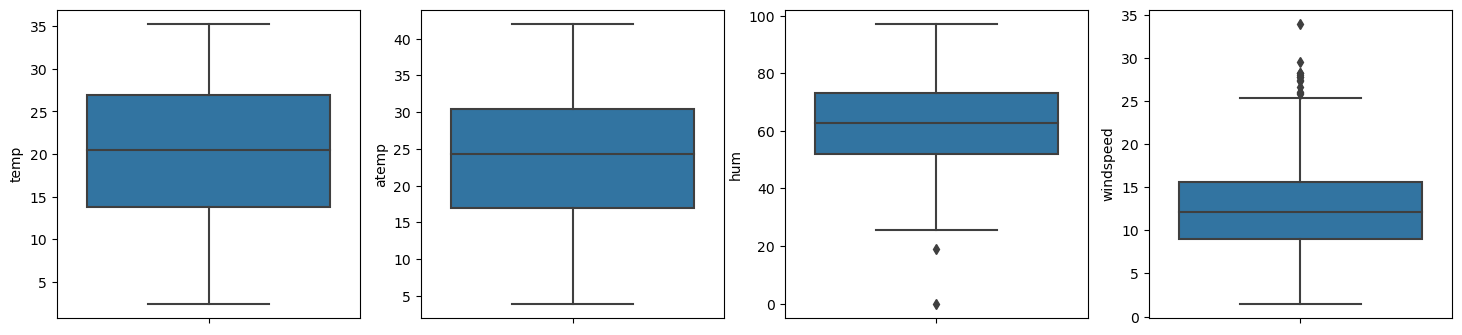

In [23]:
# Drawing box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeshare)
    i+=1

#### Observation
From these plots, its obvious that there are no outliers present in the data.

### Exploratory Data Analysis

In [24]:
#Converting season, weathersit,mnth,weekday to categorical variables
bikeshare.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeshare.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bikeshare.mnth=bikeshare.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikeshare.weekday=bikeshare.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.11,18.18,80.58,10.75,985,0
1,spring,0,jan,0,tue,1,moderate,14.90,17.69,69.61,16.65,801,1
2,spring,0,jan,0,wed,1,good,8.05,9.47,43.73,16.64,1349,2
3,spring,0,jan,0,thu,1,good,8.20,10.61,59.04,10.74,1562,3
4,spring,0,jan,0,fri,1,good,9.31,11.46,43.70,12.52,1600,4


<Figure size 1500x3000 with 0 Axes>

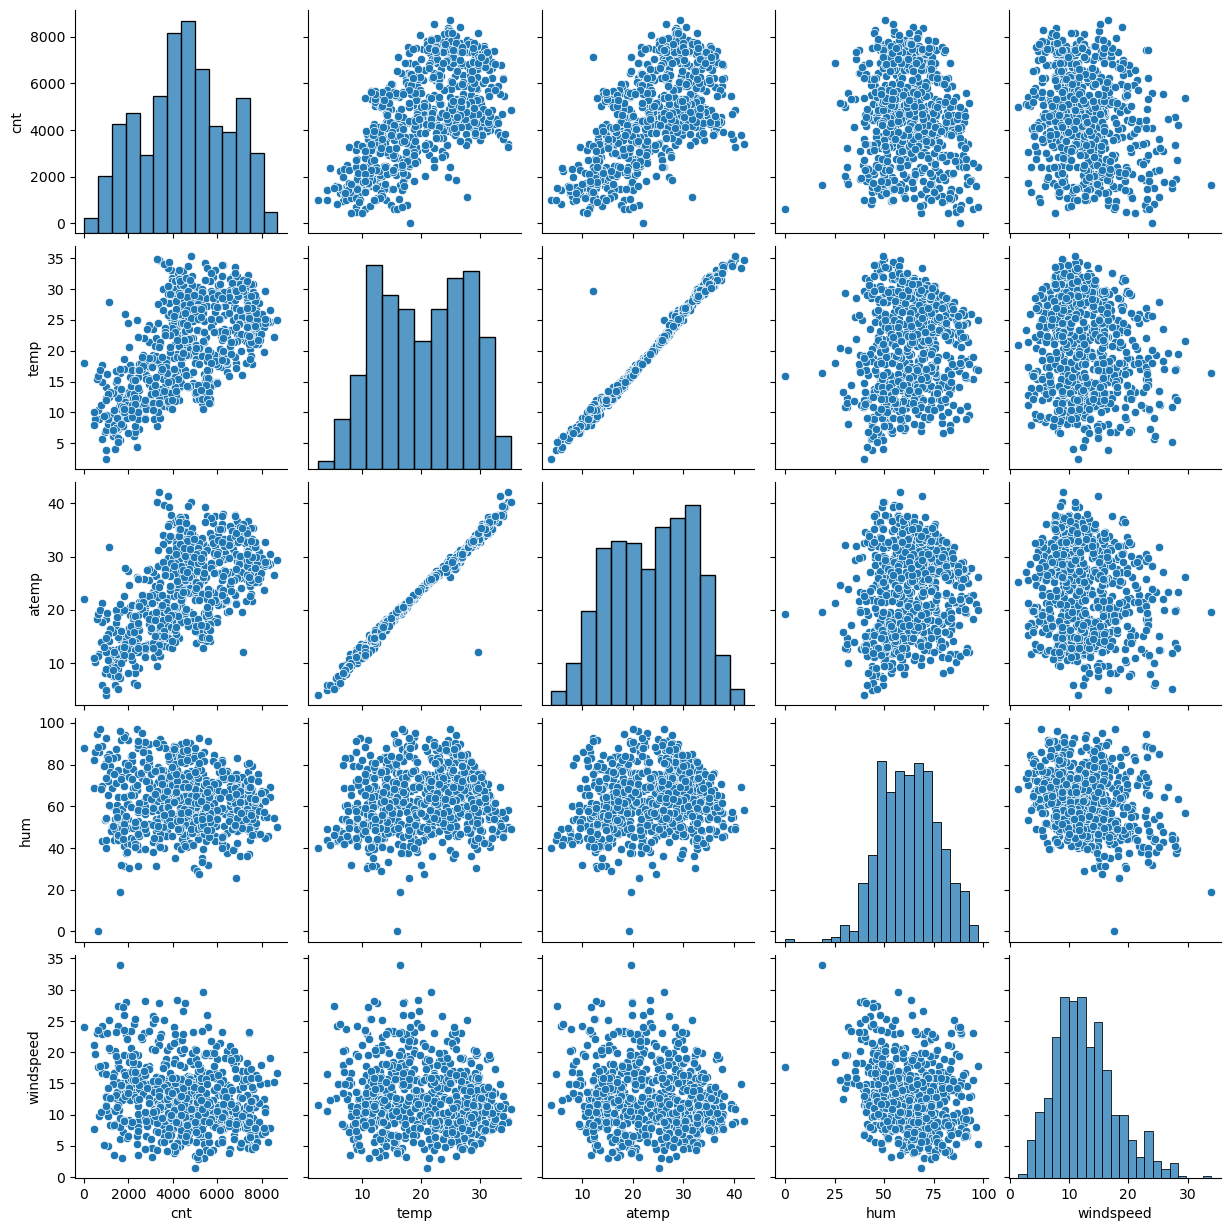

In [25]:
#Representing the numerical variables using pair plots
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeshare,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observation
* temp and atemp are highly co-related with each other.
* The temp and atemp has the highest corelation with the target variable cnt.

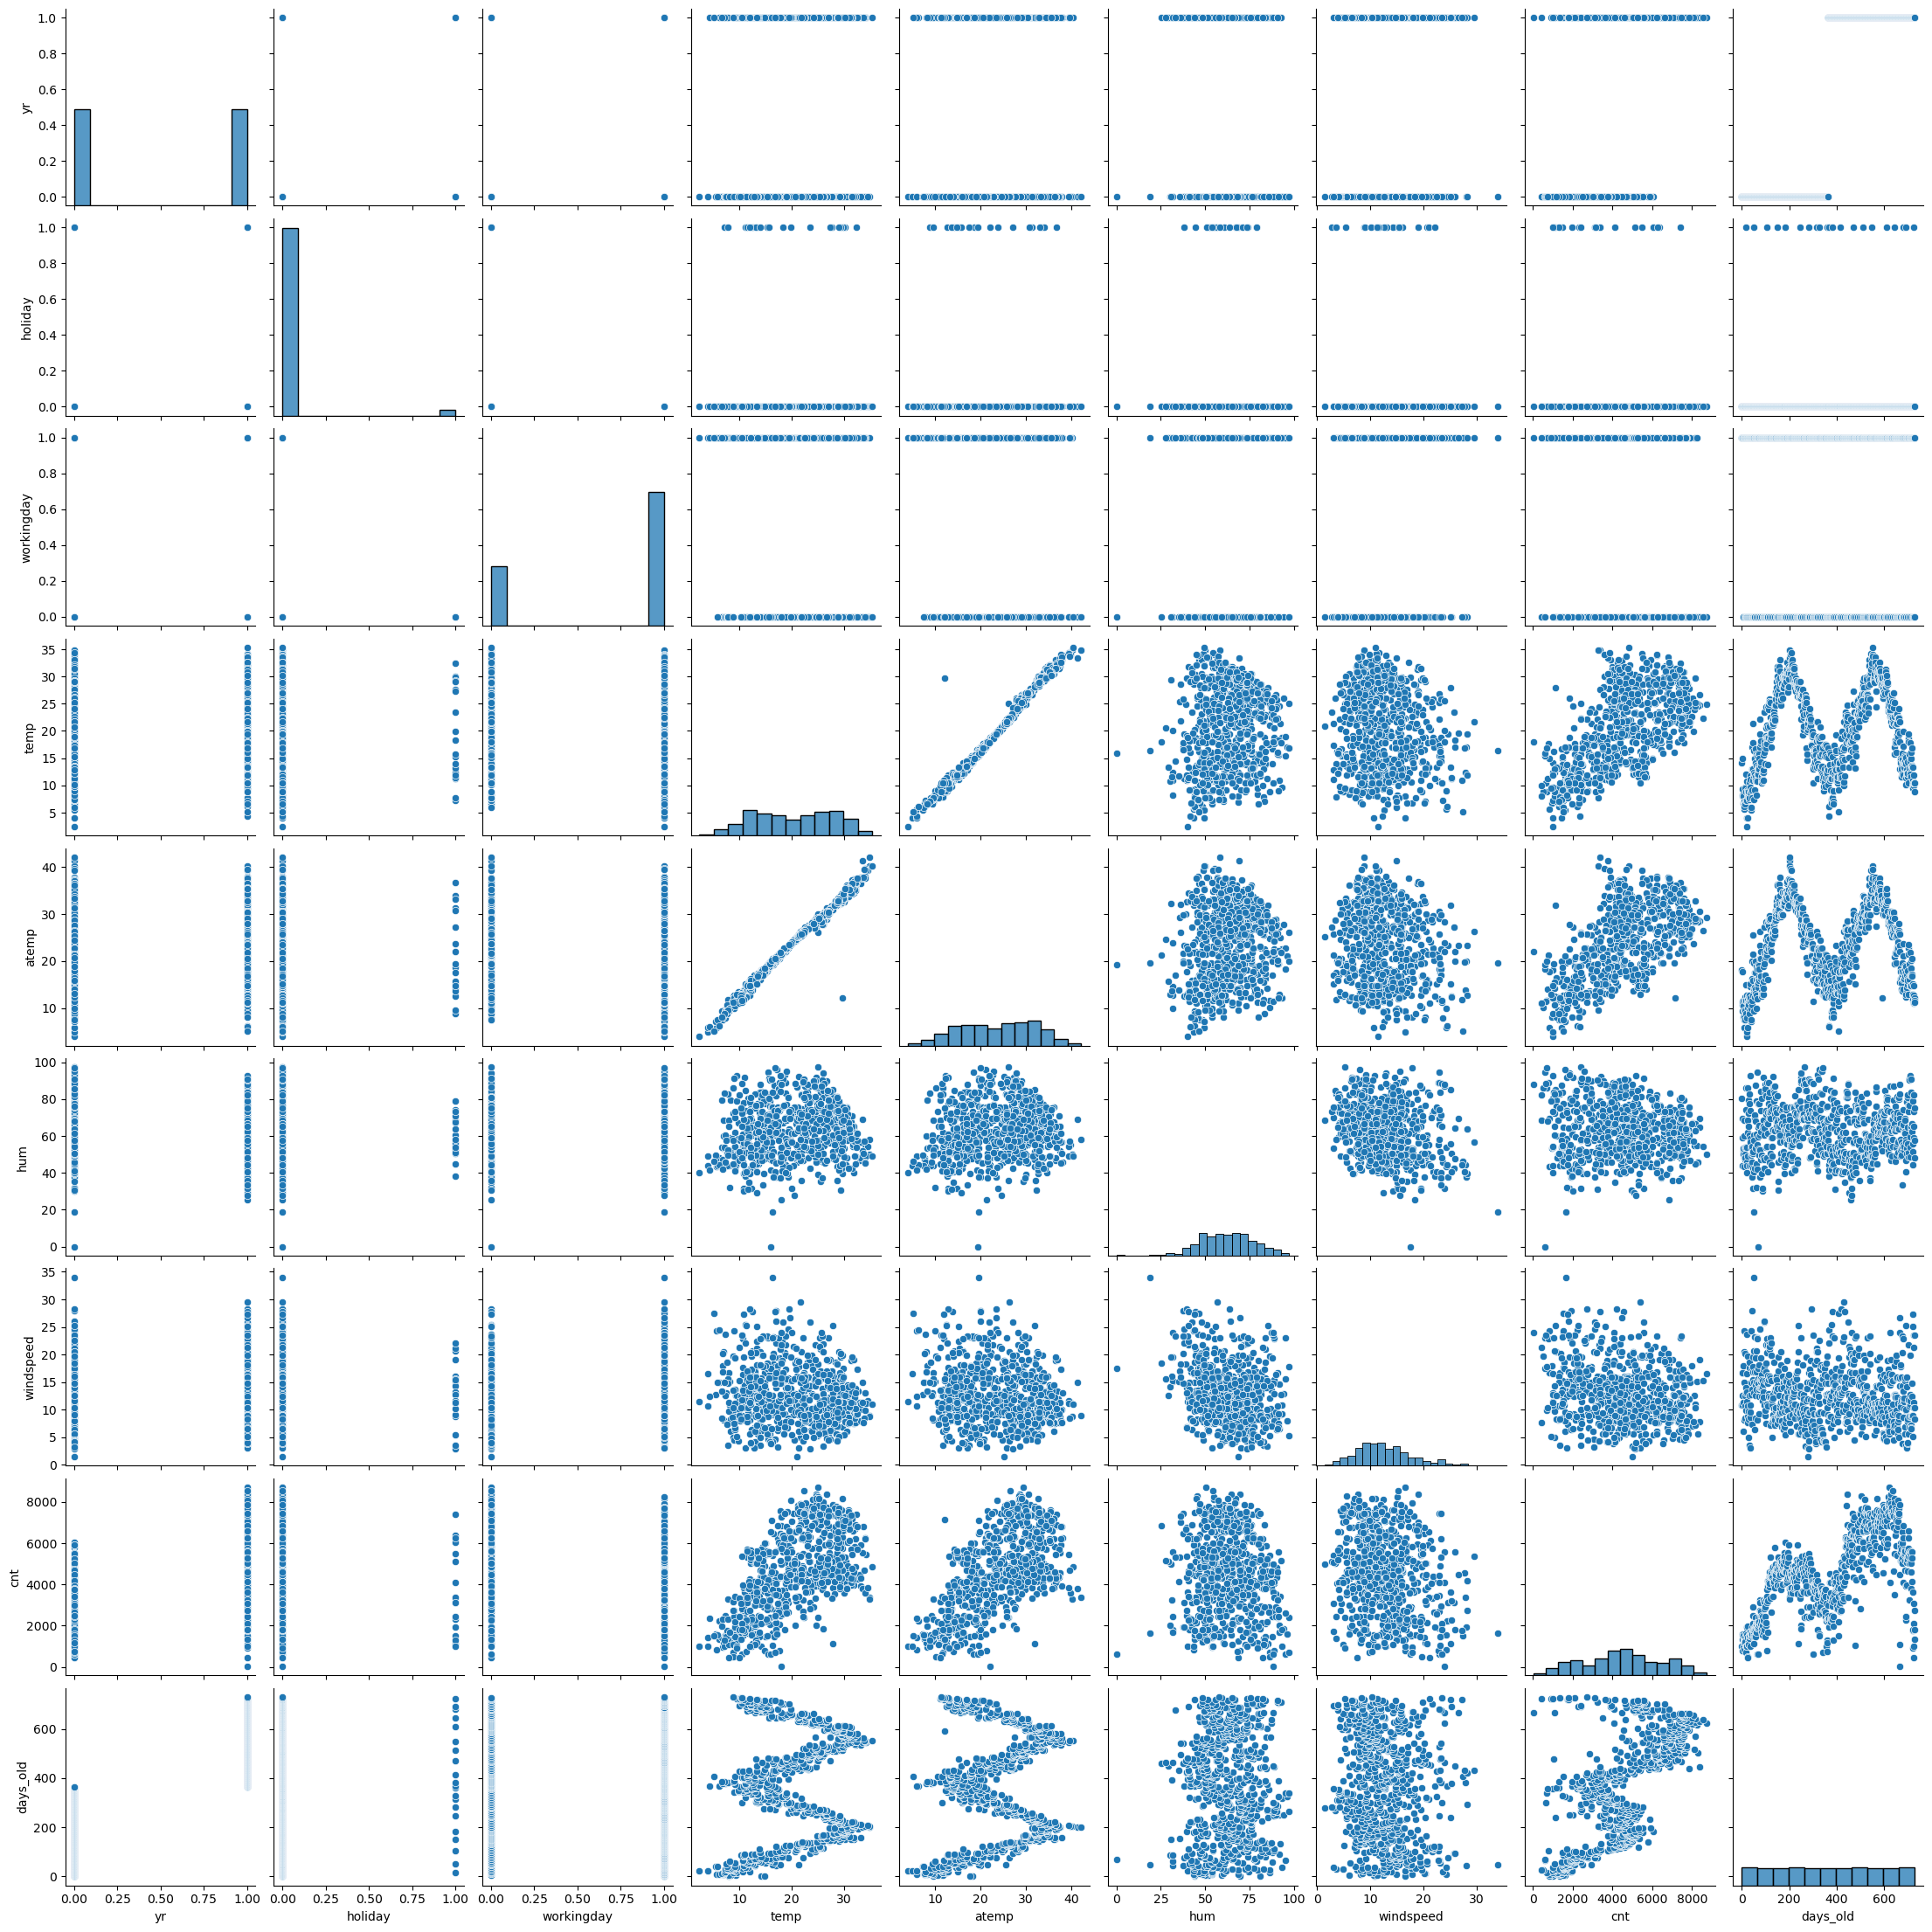

In [26]:
#Visualising the data to find the correlation between the numerical variable
sns.pairplot(bikeshare)
plt.show()

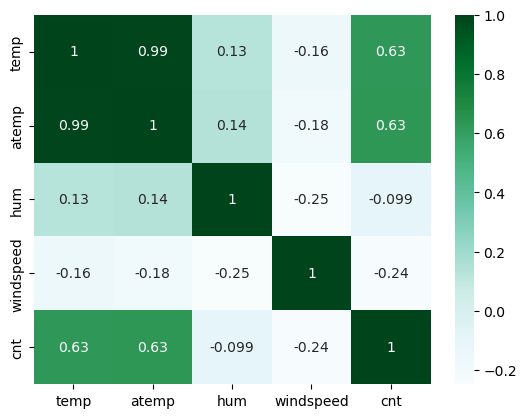

In [27]:
# Plotting a heatmap to check the continuous variable's relationship with each other
sns.heatmap(bikeshare[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Observation
Here we see that temp and atemp has correlation of 0.99 means almost equal to 1.

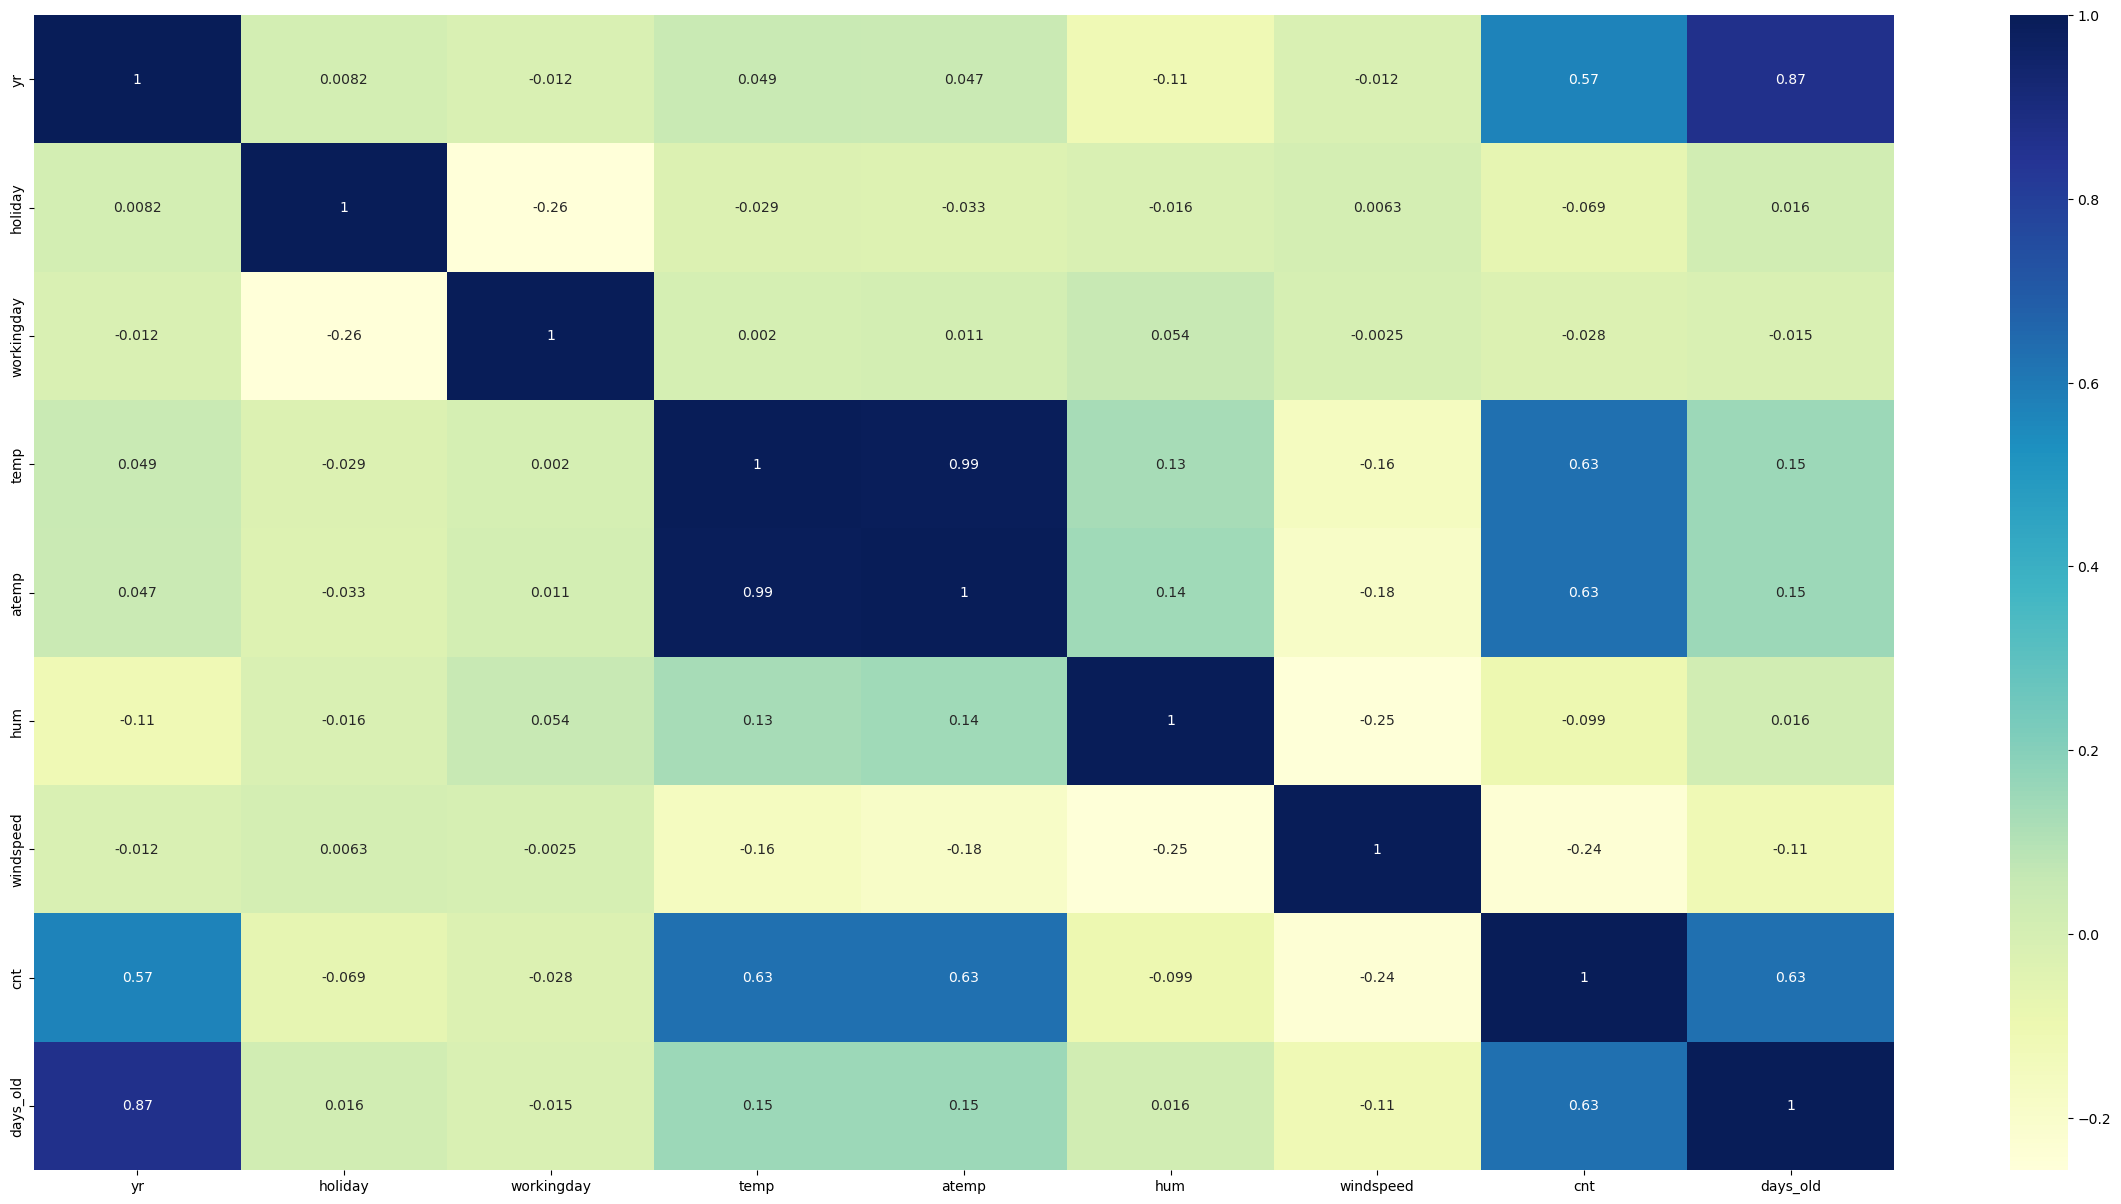

In [28]:
#Plotting a heatmap to find the correlations between numerical variables
cor=bikeshare.corr()
plt.figure(figsize=(30,15))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### Observation
From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. We also see target variable has a linear relationship with some of the independent variables. Good sign for building a linear regression model.

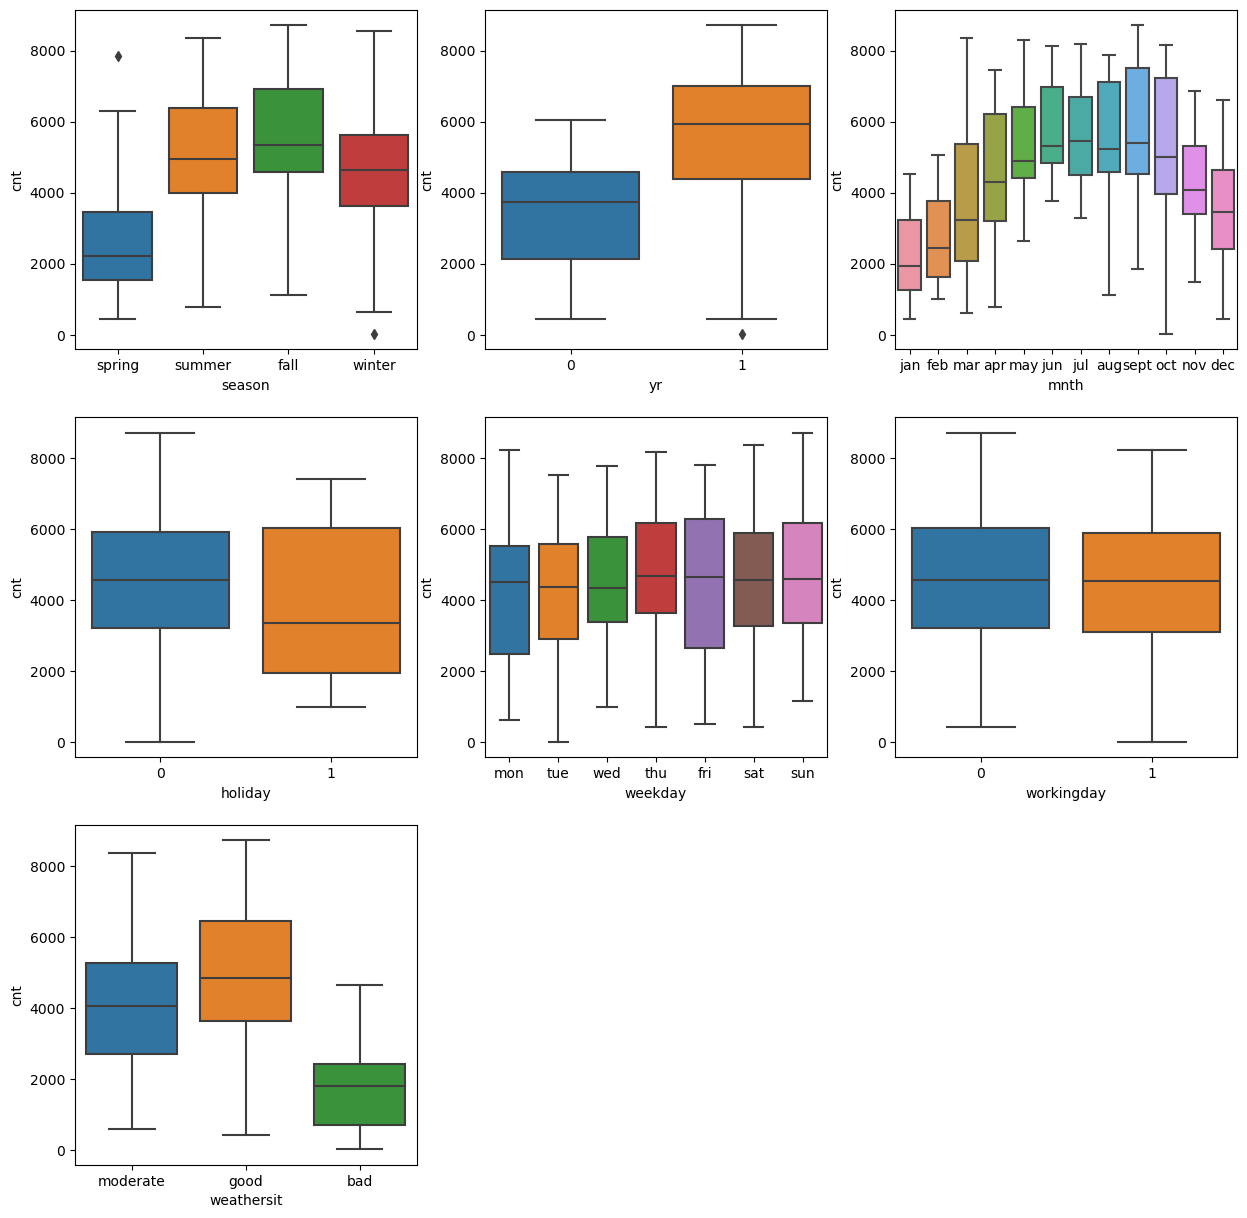

In [29]:
# Representing categorical variables using boxplots
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeshare, x=i[1], y='cnt')
plt.show()

#### Observation

    * In season fall has highest demand for rental bikes.
    * The demand of bikes for next year has grown.
    * Demand is continuously growing each month till June. September month has highest  demand, after that the demand is decreasing.
    * When there is a holiday, demand has decreased.
    * In weekday Sunday has the highest demand and tuesday has the lowest.
    * The clear weathershit has highest demand.
    * During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

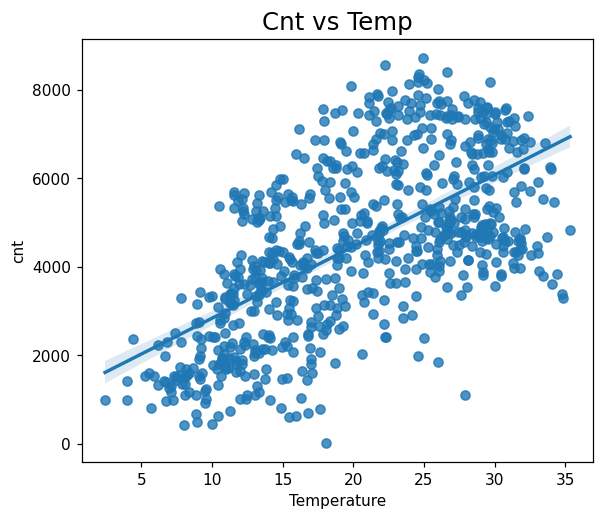

In [30]:
#Plotting a regression plot to find the relationship between cnt and Temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeshare,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Observation
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

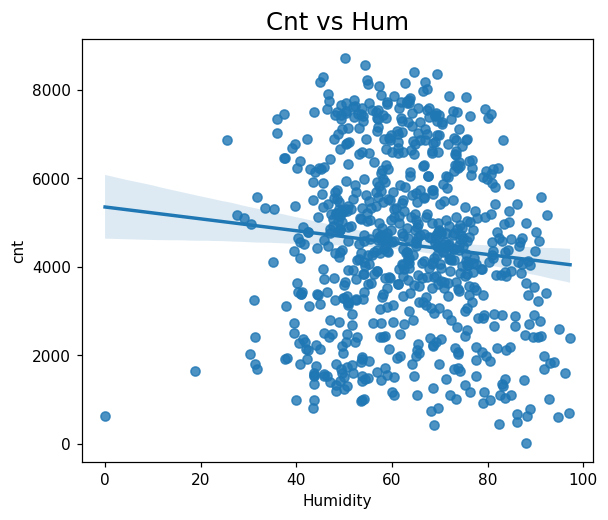

In [31]:
#Plotting a regression plot to find the relationship between cnt and hum
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeshare,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Observation
- Hum vs cnt values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

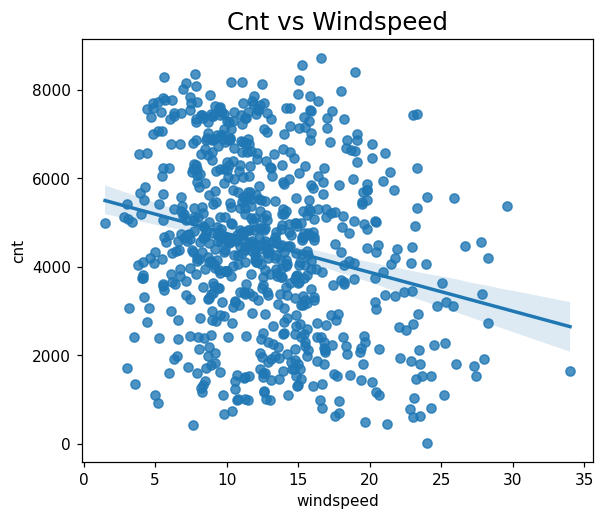

In [32]:
##Plotting a regression plot to find the relationship between cnt and windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeshare,y="cnt",x="windspeed")
plt.show()

#### Observation:
- Windspeed vs Cnt values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

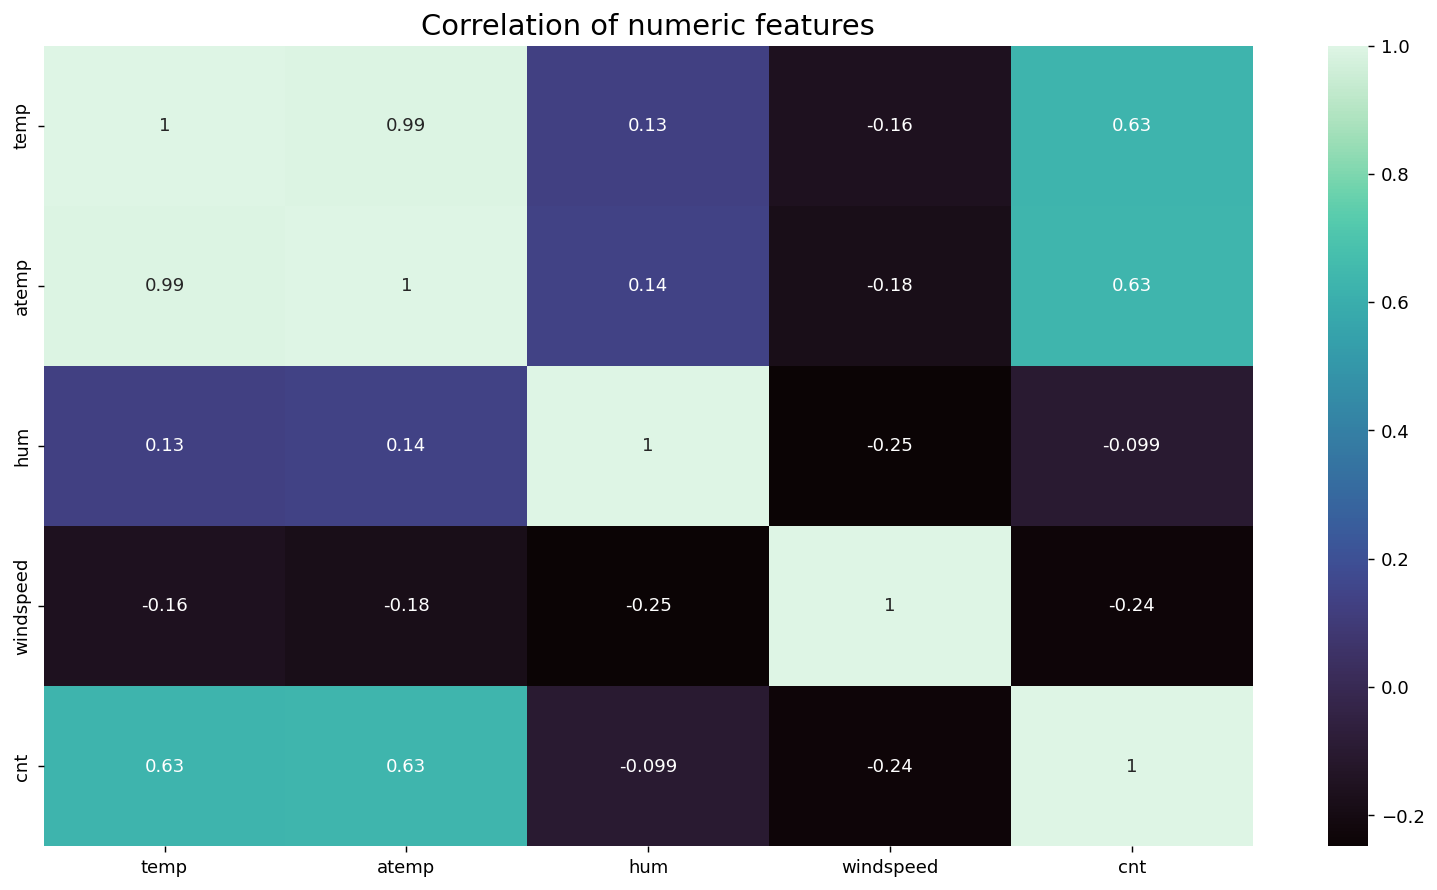

In [33]:
##Plotting a heatmap to find the correlation between numerical variables
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeshare[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### Observation
* temp and atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
* temp and atemp also have high correlation with cnt variable.

In [34]:
bikeshare.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.50,0.03,0.69,20.32,23.73,62.77,12.76,4508.01,364.50
std,0.50,0.17,0.46,7.51,8.15,14.24,5.20,1936.01,210.88
min,0.00,0.00,0.00,2.42,3.95,0.00,1.50,22.00,0.00
25%,0.00,0.00,0.00,13.81,16.89,52.00,9.04,3169.75,182.25
50%,0.50,0.00,1.00,20.47,24.37,62.62,12.13,4548.50,364.50
75%,1.00,0.00,1.00,26.88,30.45,72.99,15.63,5966.00,546.75
max,1.00,1.00,1.00,35.33,42.04,97.25,34.00,8714.00,729.00


###  Data Preparation

In [35]:
bikeshare.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [36]:
#Creating dummy variables for all categorical variables
bikeshare= pd.get_dummies(data=bikeshare,columns=["season","mnth","weekday"],drop_first=True)
bikeshare = pd.get_dummies(data=bikeshare,columns=["weathersit"])

In [37]:
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.11,18.18,80.58,10.75,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.90,17.69,69.61,16.65,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


#### Observation
- We dropped the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [38]:
#Printing columns after creating dummies
bikeshare.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [39]:
#Printing rows to inspect
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.11,18.18,80.58,10.75,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.90,17.69,69.61,16.65,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


### Model Building

In [40]:
# Checking the shape of dataframe
bikeshare.shape

(730, 32)

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','days_old','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.51,0.50,0.58,0.30,0.86,0.90,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.82,0.77,0.73,0.26,0.83,0.79,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.44,0.44,0.64,0.26,0.47,0.59,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.25,0.20,0.50,0.66,0.20,1.00,1,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.40,0.39,0.50,0.19,0.48,0.66,0,...,0,0,0,1,0,0,0,0,0,1


In [44]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
#Inspecting the columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 13),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days_old', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [50]:
#Function to build a model using statsmodel api - takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [51]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [52]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [53]:
X_train_rfe.shape

(510, 15)

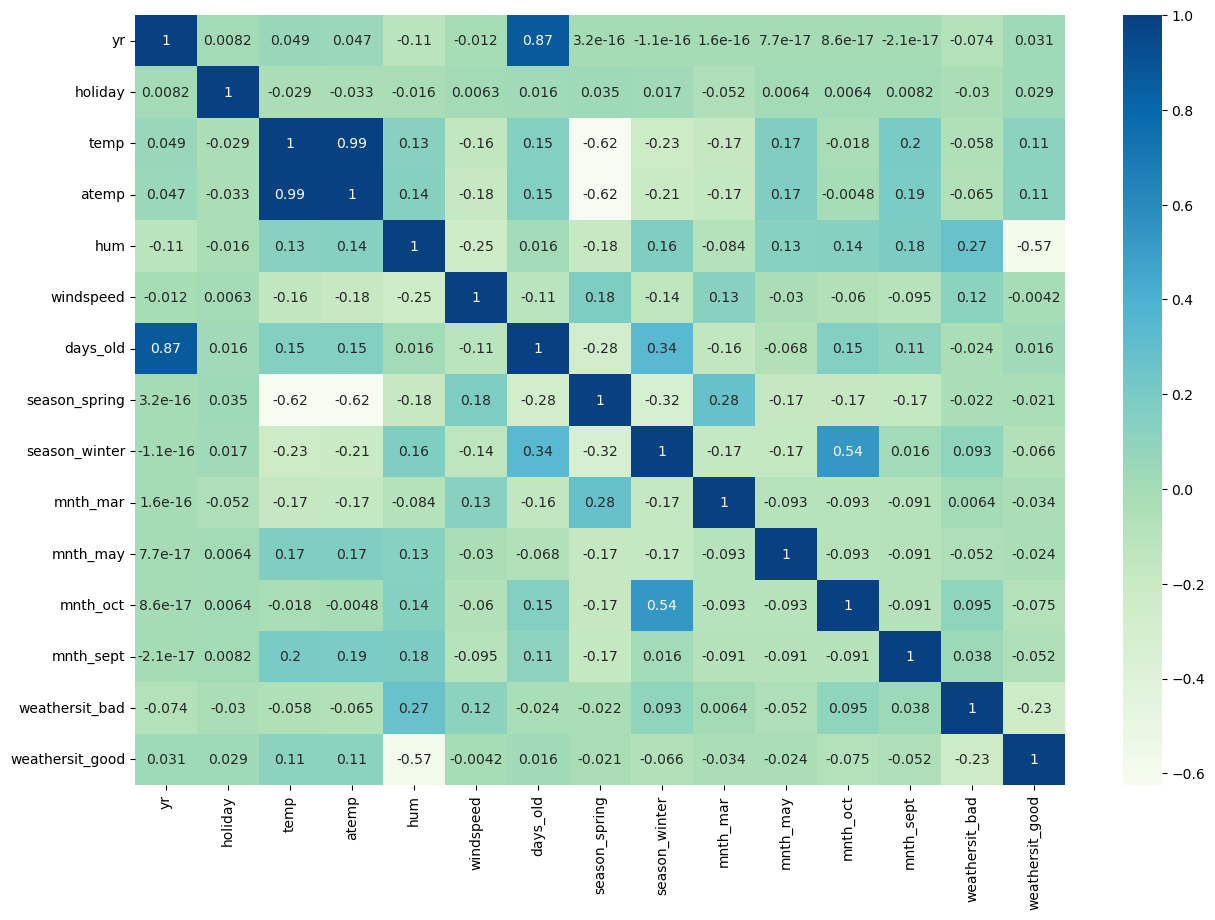

In [54]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target coulmn.
plt.figure(figsize = (15,10))
sns.heatmap(bikeshare[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 1

In [55]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.17e-185
Time:                        15:47:17   Log-Likelihood:                 506.26
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     494   BIC:                            -912.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2955      0.036     

#### Model 2

In [56]:
# Removing feature atemp as it has high p-value and high VIF
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          9.07e-187
Time:                        15:47:17   Log-Likelihood:                 506.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     495   BIC:                            -918.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2963      0.036     

#### Model 3

In [57]:
#Removing feature days_old as it has high p value and high VIF
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          7.31e-188
Time:                        15:47:17   Log-Likelihood:                 506.02
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     496   BIC:                            -924.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2937      0.036     

#### Model 4

In [58]:
#Removing hum as it has high VIF
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.4
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          4.06e-185
Time:                        15:47:17   Log-Likelihood:                 496.72
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     497   BIC:                            -912.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1799      0.024     

#### Model 5

In [59]:
#Removing mnth_oct as it has high p value
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          4.89e-185
Time:                        15:47:17   Log-Likelihood:                 493.71
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     498   BIC:                            -912.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1695      0.024     

#### Model 6

In [60]:
#Removing mnth_may as it has high p value
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.36e-184
Time:                        15:47:17   Log-Likelihood:                 489.81
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     499   BIC:                            -911.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1846      0.024     

#### Model 7

In [61]:
#Removing mnth_mar as it has high p value
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          3.31e-184
Time:                        15:47:17   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1885      0.024     

### Independence of residuals check

#### Observation
We can see that VIF came below 5 and we can consider the above model 7, as it seems to have very low multicolinearity between the predictor variables and the p-values for all the predictors seems to be significant.

In [62]:
#Building  a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [63]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)

### Model evaluation

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### Residual Analysis

In [64]:
y_train_pred = lr.predict(X_train[cols])

### Normality Check

In [65]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

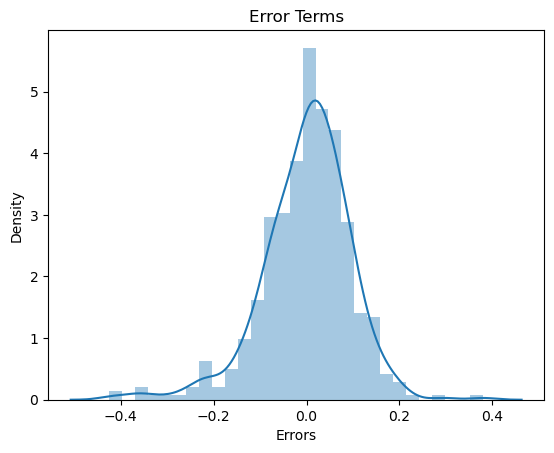

In [66]:
plot_res_dist(y_train, y_train_pred)

#### Observations
Errors are normally distribured here with mean zero.

### Independence of residuals check

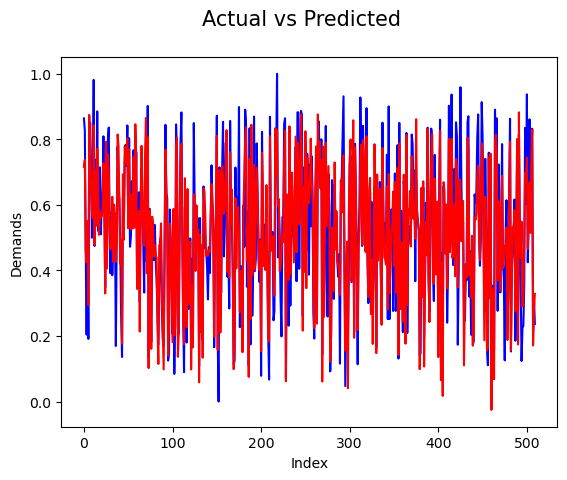

In [67]:
# Plotting a graph for Actual Vs predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation
Actual and predicted result following almost the same pattern so this model seems ok.

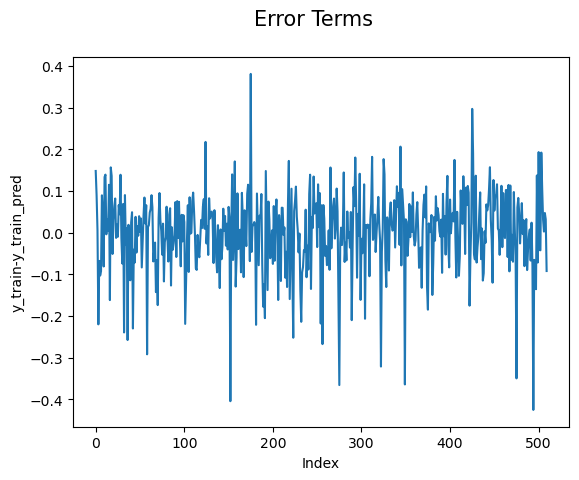

In [68]:
# Plotting for error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation
Here, we see that the error terms are independent of each other.

In [69]:
from sklearn.metrics import r2_score

In [70]:
#Printing R-squared Value
r2=r2_score(y_train,y_train_pred)
print(r2)

0.8185588096982063


#### Observation
R2 score almost equal to the R2_score that we got from model.

### Homoscedacity Check

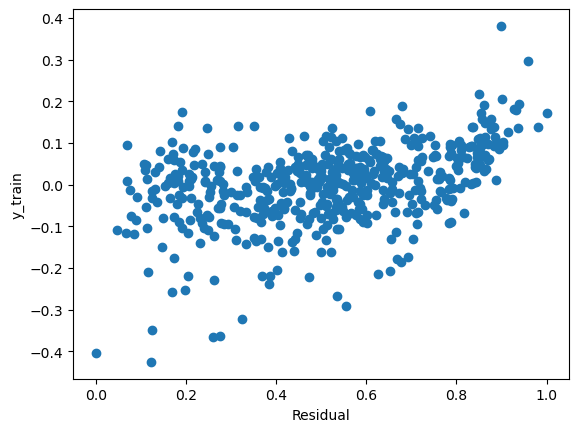

In [71]:
# Plotting scatter plot for the Homoscedacity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Observation

We can observe no relationship in residual values

In [72]:
#Predict values for test data set
#Scaling variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [75]:
# Making predictions
y_pred = lr.predict(X_test[cols])

In [76]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [77]:
# Finding out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8110019167467447

In [78]:
#Calculating the Adjusted R squared for test data
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7873431210441342

R2 value for predictions on test data (0.818) is almost same as R2 value of train data(0.811). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

Text(0, 0.5, 'y_test_pred')

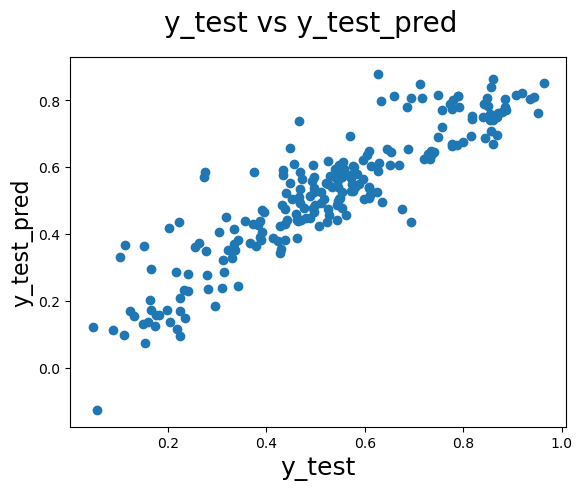

In [79]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Observation
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

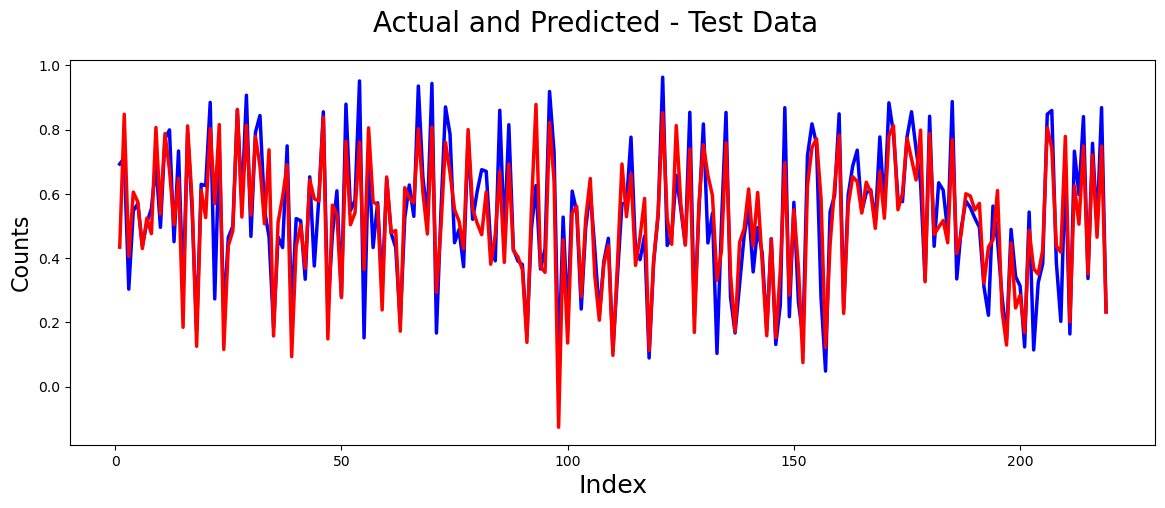

In [80]:
# Plotting Actual vs Predicted for Test Data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

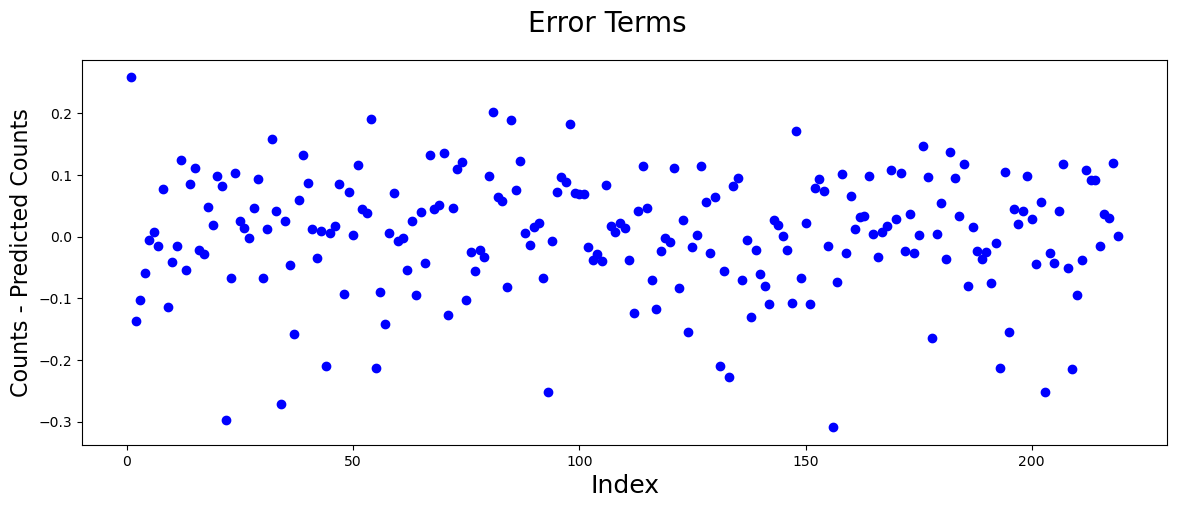

In [81]:
# Plot Error Terms for test data
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plot_err_terms(y_test,y_test_pred)

#### Observation
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### Making Predictions

In [82]:
# Checking data before scaling
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.11,18.18,80.58,10.75,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.90,17.69,69.61,16.65,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [83]:
#Let us rebuild the final model of manual and rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          5.27e-179
Time:                        15:47:18   Log-Likelihood:                 473.75
No. Observations:                 510   AIC:                            -927.5
Df Residuals:                     500   BIC:                            -885.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1889    

### Final Result Comparison

* Train R^2 :0.827
* Train Adjusted R^2 : 0.824
* Test R^2 :0.811
* Test Adjusted R^2 :0.809


This seems to be a really good model that can very well generalize various datasets.

### Insights

#### Analysing the above model, the comapany should focus on the following features:
- Temperature is the most significant feature which affects the business positively.
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serice the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.